This is the notebook for tf-idf embeddings and visualizations

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
reports = pd.read_csv('open_ave_data.csv')
reports = reports.dropna()
reports.head(3)

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.


In [4]:
report_findings = reports['findings'].str.split().tolist()
report_clinicaldata = reports['clinicaldata'].str.split().tolist()
report_examname = reports['ExamName'].str.split().tolist()
report_impression = reports['impression'].str.split().tolist()
# Take the limit to be the first tenth of values
findings_limit = len(report_findings) * 0.1
corpus_findings=[word for i in report_findings if isinstance(i, list) for word in i ]
corpus_clinicaldata=[word for i in report_clinicaldata if isinstance(i, list) for word in i ]
corpus_examname=[word for i in report_examname if isinstance(i, list) for word in i ]
corpus_impression=[word for i in report_impression if isinstance(i, list) for word in i ]
corpus = corpus_findings + corpus_clinicaldata + corpus_examname + corpus_impression

In [5]:
# Get the tfidf vectorizer fit
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['00', '01', '02', ..., 'your', 'zip', 'zone'], dtype=object)

In [6]:
X

<51766x1080 sparse matrix of type '<class 'numpy.float64'>'
	with 54067 stored elements in Compressed Sparse Row format>

In [7]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X)
X_embedded

array([[ -6.159376 ,  78.6434   ],
       [ 16.479462 , -14.2997465],
       [ 47.84462  , -53.777863 ],
       ...,
       [-45.21333  ,  61.674965 ],
       [-85.002815 ,  42.773197 ],
       [-43.31585  ,  44.457798 ]], dtype=float32)

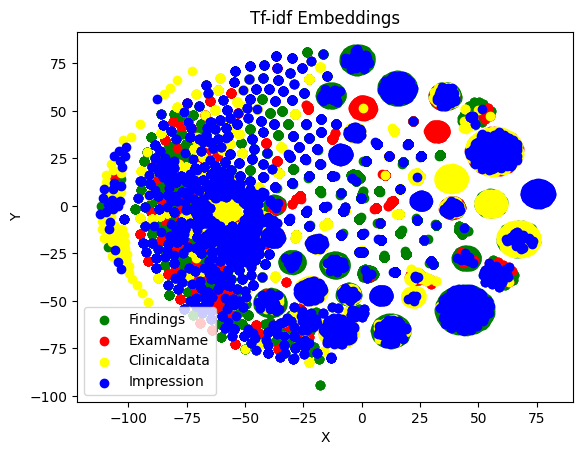

In [9]:
plt.title("Tf-idf Embeddings")
plt.xlabel("X")
plt.ylabel("Y")

# Notation :,# takes all the columns from the number
lF = len(corpus_findings)
lC = len(corpus_clinicaldata)
lE = len(corpus_examname)
lI = len(corpus_impression)


plt.scatter(X_embedded[0:lF,0], X_embedded[0:lF,1], c='green')
plt.scatter(X_embedded[lF:lF+lC,0], X_embedded[lF:lF+lC,1], c='red')
plt.scatter(X_embedded[lF+lC:lF+lC+lE,0], X_embedded[lF+lC:lF+lC+lE,1], c='yellow')
plt.scatter(X_embedded[lF+lC+lE:,0], X_embedded[lF+lC+lE:,1], c='blue')
plt.legend(['Findings', 'ExamName','Clinicaldata','Impression'])

In [10]:
plt.show()

In [11]:
# Imports for supervised machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
# Examdata, clinical data, findings, impression combined for trainign
# x = np.concatenate((X_embeddedE, X_embeddedC, X_embeddedF,X_embeddedI), axis=0)
# y = np.array([0, 1, 2, 3])
# x = X_embeddedE
x = X_embedded
e = [0]*len(corpus_examname)
c = [1]*len(corpus_clinicaldata)
f= [2]*len(corpus_findings)
i=[3]*len(corpus_impression)
total = e+c+f+i
y = np.array(total)

In [13]:
# Apply train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = False, test_size=0.20, random_state=42)

In [14]:
# Regression - fits the model and returns it with the intercept and slope
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.008692292833687464

In [15]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [16]:
# model = LogisticRegression().fit(x_train, y_train)
# model.score(x_train, y_train)
# model.score(x_test, y_test)

# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
# model.score(x_train, y_train)
# model.score(x_test, y_test)

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
# model.score(x_train, y_train)
# model.score(x_test, y_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [18]:
lr=LogisticRegression(C=1, solver ='saga')
lr.fit(x_train, y_train)
lr_preds=lr.predict(x_test)

print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
print("Accuracy Score: %.3f" % accuracy_score(y_test, lr_preds))

[[   90     0]
 [10264     0]]
              precision    recall  f1-score   support

           2       0.01      1.00      0.02        90
           3       0.00      0.00      0.00     10264

    accuracy                           0.01     10354
   macro avg       0.00      0.50      0.01     10354
weighted avg       0.00      0.01      0.00     10354

Accuracy Score: 0.009


c:\Users\elefe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elefe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elefe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

c:\Users\elefe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[   90,     0],
       [10264,     0]], dtype=int64)

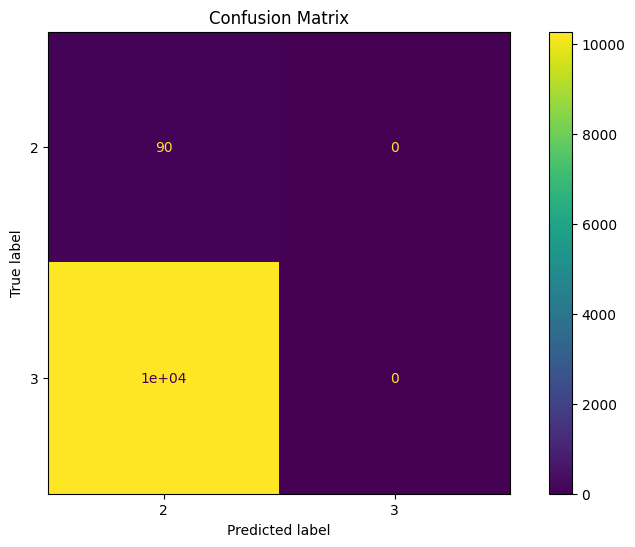

In [19]:
# Graph confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Confusion Matrix")
display = plot_confusion_matrix(model, x_test, y_test, ax=ax)
display.confusion_matrix

In [20]:
# Start gensim analysis with imports
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec,KeyedVectors
from gensim.test.utils import datapath
import re
import unicodedata
from tqdm import tqdm
import gensim
import multiprocessing
import random

In [21]:
# Get the corpus
new_corpus = corpus

In [22]:
# Create empty gensim model
cores= multiprocessing.cpu_count()
model = Word2Vec(min_count=5,window=5,workers=cores-1,max_vocab_size=100000)

In [23]:
# Model using the dataset as the vocabulary
model.build_vocab(new_corpus)

In [24]:
# Train the model
model.train(new_corpus,total_examples=model.corpus_count,epochs=50)

(4682131, 16689450)

In [25]:
# Save the model
model.save('gensim_w2v_model.model')
# Load the model
# trained_model = gensim.models.Word2Vec.load('gensim_w2v_model.model')